### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 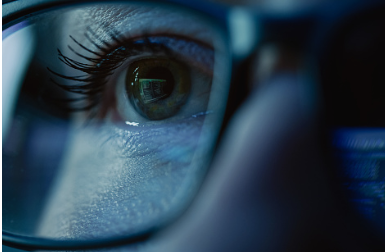 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

In [2]:
pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
astunparse               

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
astunparse               

In [4]:
import cv2
print(cv2.__version__)

4.10.0


In [ ]:
### 1. Code to Display Images from Each Class:

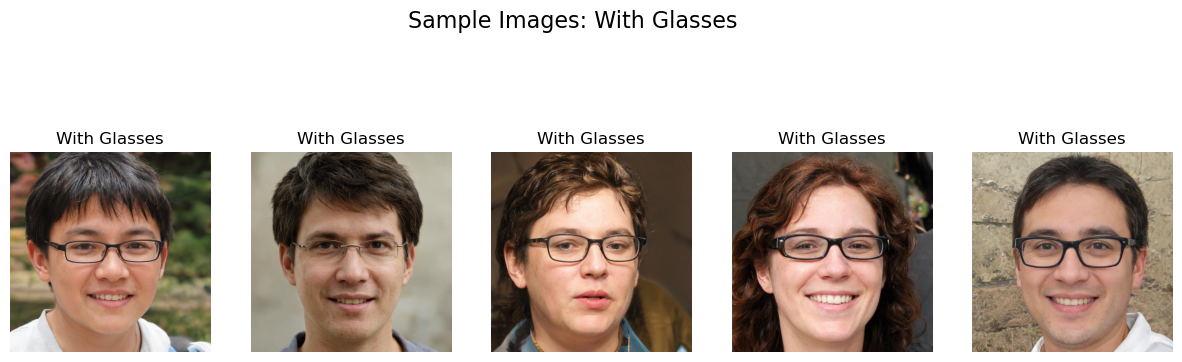

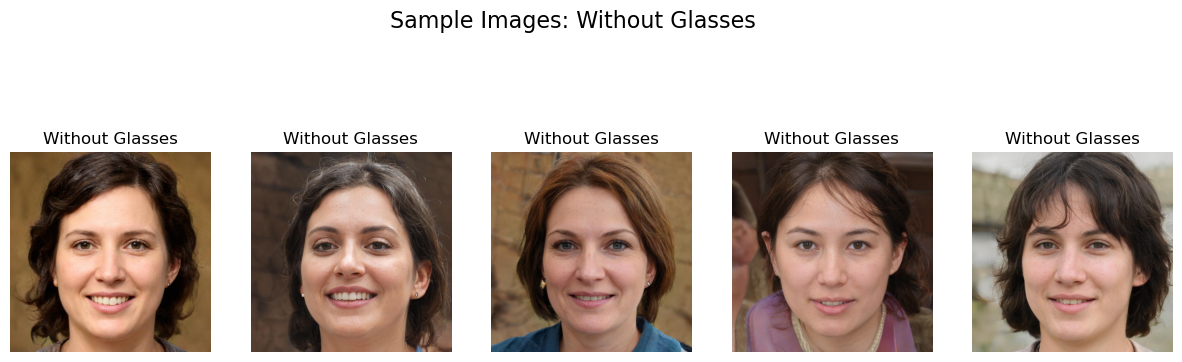

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Define the paths to the two classes
with_glasses_dir = r'E:\Nural Network Questiones\glasses_3_3_1\glasses\glasses'
without_glasses_dir = r'E:\Nural Network Questiones\glasses_3_3_1\glasses\no_glasses'

# Function to display sample images from a directory
def display_images_from_class(image_dir, class_name, num_images=5):
    image_files = os.listdir(image_dir)  # List all image files in the directory
    random.shuffle(image_files)  # Shuffle the images to display random samples
    sample_images = image_files[:num_images]  # Pick a few random images

    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Sample Images: {class_name}", fontsize=16)

    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(image_dir, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"{class_name}")
        plt.axis('off')  # Hide axes for a cleaner look

    plt.show()

# Display 5 images from each class
display_images_from_class(with_glasses_dir, "With Glasses", num_images=5)
display_images_from_class(without_glasses_dir, "Without Glasses", num_images=5)

In [ ]:
### 2. CNN Model Building Code:

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential()

# 1st Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(128, activation='relu'))

# Output layer for binary classification (with glasses / without glasses)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

C:\Users\bipas\anaconda3\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
### 3. Explain the parameters in CNN

In [ ]:
## Each of these parameters can significantly impact the performance of a CNN model. By carefully tuning them, I am optimizing the model for better accuracy and generalization on unseen data.

# Choose the Right Filters: Selecting the right number and size of filters is crucial for feature extraction.
# Adjust Stride and Padding: These affect how much spatial information is retained.
# Pooling Layers: They help reduce dimensionality while keeping essential features.
# Dense Layers: Their configuration can determine the model’s learning capacity.
# Training Parameters: Batch size, epochs, learning rates, and regularization techniques all play roles in how well the model learns and generalizes.
# By experimenting with these parameters, now I can find the optimal configuration for the specific dataset and task. 

In [ ]:
### 4. Draw inference on Image augmentation

In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# the paths of dataset
with_glasses_dir = r'E:\Nural Network Questiones\glasses_3_3_1\glasses\glasses'
without_glasses_dir = r'E:\Nural Network Questiones\glasses_3_3_1\glasses\no_glasses'

# Define parameters
image_size = (128, 128)
batch_size = 32

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training generator
train_generator = train_datagen.flow_from_directory(
    r'E:\Nural Network Questiones\glasses_3_3_1\glasses',  # Parent directory containing 'glasses' and 'no_glasses'
    target_size=image_size,  
    batch_size=batch_size, 
    class_mode='binary'  # Binary classification (glasses vs no glasses)
)

# Create validation generator (optional, for validation data)
val_generator = val_datagen.flow_from_directory(
    r'E:\Nural Network Questiones\glasses_3_3_1\glasses',  # Adjust as needed for validation data
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Create test generator 
test_generator = test_datagen.flow_from_directory(
    r'E:\Nural Network Questiones\glasses_3_3_1\glasses',  # Adjust as needed for test data
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model using augmented data
history = model.fit(train_generator, epochs=25, validation_data=val_generator)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")



Found 86 images belonging to 2 classes.
Found 86 images belonging to 2 classes.
Found 86 images belonging to 2 classes.
Epoch 1/25


C:\Users\bipas\anaconda3\New folder\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5908 - loss: 0.7375 - val_accuracy: 0.6977 - val_loss: 0.6618
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 748ms/step - accuracy: 0.7560 - loss: 0.6483 - val_accuracy: 0.6977 - val_loss: 0.6114
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 735ms/step - accuracy: 0.6926 - loss: 0.6213 - val_accuracy: 0.6977 - val_loss: 0.6219
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 735ms/step - accuracy: 0.6860 - loss: 0.6869 - val_accuracy: 0.6977 - val_loss: 0.6023
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 863ms/step - accuracy: 0.7013 - loss: 0.6072 - val_accuracy: 0.6977 - val_loss: 0.5998
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 661ms/step - accuracy: 0.7277 - loss: 0.5868 - val_accuracy: 0.6977 - val_loss: 0.5956
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 670ms/step - accuracy: 0.7137 - loss: 0.5709 - val_accuracy: 0.6977 - val_loss: 0.5962
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 731ms/step - accuracy: 0.7158 - loss: 0.5885 - val_accuracy: 0.6977 - val_loss: 0.5898
Epoch 

In [ ]:
### 5. Draw inference on epochs and batch sizes

Found 86 images belonging to 2 classes.
Found 86 images belonging to 2 classes.


C:\Users\bipas\anaconda3\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6310 - loss: 0.6982 - val_accuracy: 0.6977 - val_loss: 0.6176
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 666ms/step - accuracy: 0.6498 - loss: 0.6400 - val_accuracy: 0.6977 - val_loss: 0.6073
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 673ms/step - accuracy: 0.7308 - loss: 0.6102 - val_accuracy: 0.6977 - val_loss: 0.6129
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 647ms/step - accuracy: 0.7082 - loss: 0.5892 - val_accuracy: 0.6977 - val_loss: 0.6089
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 687ms/step - accuracy: 0.7418 - loss: 0.5865 - val_accuracy: 0.6977 - val_loss: 0.6008
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 818ms/step - accuracy: 0.6671 - loss: 0.6224 - val_accuracy: 0.6977 - val_loss: 0.5917
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - accuracy: 0.6848 - loss: 0.6027 - val_accuracy: 0.6977 - val_loss: 0.6004
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 646ms/step - accuracy: 0.6887 - loss: 0.6124 - val_accuracy: 0.6977 - val_loss: 0.

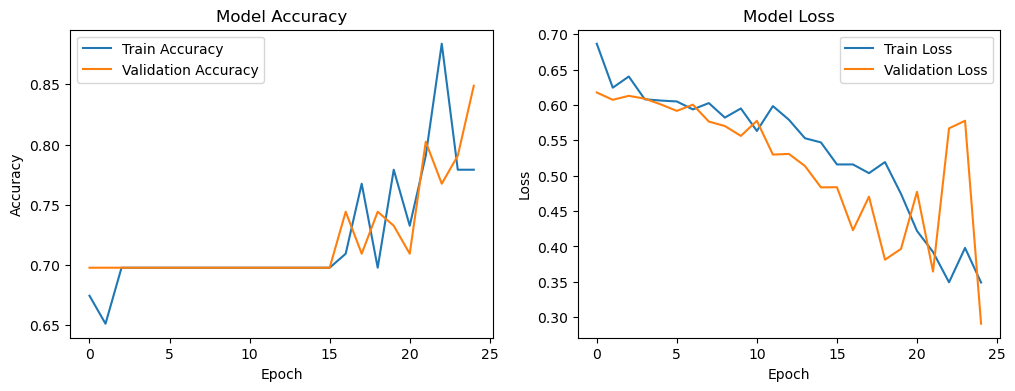

In [9]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# paths to the dataset
with_glasses_dir = r'E:\Nural Network Questiones\glasses_3_3_1\glasses\glasses'
without_glasses_dir = r'E:\Nural Network Questiones\glasses_3_3_1\glasses\no_glasses'

# Define parameters
image_size = (128, 128)  # Resize images to 128x128
batch_size = 32  # Batch size for training
epochs = 25  # Number of epochs to train

# Create ImageDataGenerator instances for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Fill missing pixels after transformations
)

# Create validation generator without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Create training generator
train_generator = train_datagen.flow_from_directory(
    r'E:\Nural Network Questiones\glasses_3_3_1\glasses',  # Directory for training data
    target_size=image_size,  
    batch_size=batch_size, 
    class_mode='binary',  # Binary classification (glasses vs no glasses)
    shuffle=True  # Shuffle data for randomness
)

# Create validation generator
val_generator = val_datagen.flow_from_directory(
    r'E:\Nural Network Questiones\glasses_3_3_1\glasses',  # Directory for validation data
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # First Conv Layer
    MaxPooling2D(pool_size=(2, 2)),  # First Max Pooling Layer
    Conv2D(64, (3, 3), activation='relu'),  # Second Conv Layer
    MaxPooling2D(pool_size=(2, 2)),  # Second Max Pooling Layer
    Conv2D(128, (3, 3), activation='relu'),  # Third Conv Layer
    MaxPooling2D(pool_size=(2, 2)),  # Third Max Pooling Layer
    Flatten(),  # Flatten the 3D output to 1D
    Dense(128, activation='relu'),  # Fully Connected Layer
    Dropout(0.5),  # Dropout Layer for regularization
    Dense(1, activation='sigmoid')  # Output Layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model using the training and validation data
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Evaluate the model on validation data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plotting training & validation accuracy and loss
plt.figure(figsize=(12, 4))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [ ]:
### 6. Complete Code for Classifying People with and without Glasses

Found 86 images belonging to 2 classes.
Found 86 images belonging to 2 classes.


C:\Users\bipas\anaconda3\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


C:\Users\bipas\anaconda3\New folder\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4602 - loss: 0.8098 - val_accuracy: 0.6977 - val_loss: 0.7089
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 702ms/step - accuracy: 0.6927 - loss: 0.6597 - val_accuracy: 0.6977 - val_loss: 0.6422
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 694ms/step - accuracy: 0.7082 - loss: 0.6345 - val_accuracy: 0.6977 - val_loss: 0.6045
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 954ms/step - accuracy: 0.6888 - loss: 0.6063 - val_accuracy: 0.6977 - val_loss: 0.6201
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 661ms/step - accuracy: 0.7160 - loss: 0.6115 - val_accuracy: 0.6977 - val_loss: 0.6103
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 670ms/step - accuracy: 0.6770 - loss: 0.6488 - val_accuracy: 0.6977 - val_loss: 0.6295
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 668ms/step - accuracy: 0.6425 - loss: 0.6451 - val_accuracy: 0.6977 - val_loss: 0.6002
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 687ms/step - accuracy: 0.7091 - loss: 0.6125 - val_accuracy: 0.6977 - val_loss: 0.6126
Epoch 

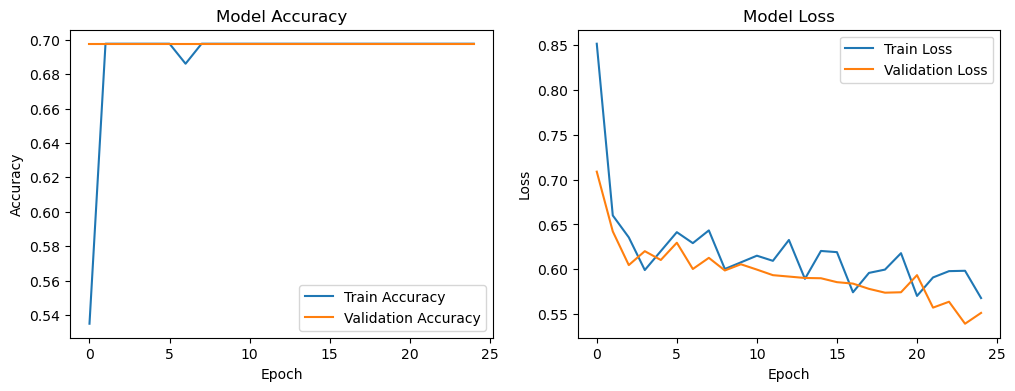

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step
Classification Report:
              precision    recall  f1-score   support

     glasses       0.70      1.00      0.82        60
  no_glasses       0.00      0.00      0.00        26

    accuracy                           0.70        86
   macro avg       0.35      0.50      0.41        86
weighted avg       0.49      0.70      0.57        86

Confusion Matrix:
[[60  0]
 [26  0]]


C:\Users\bipas\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bipas\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bipas\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


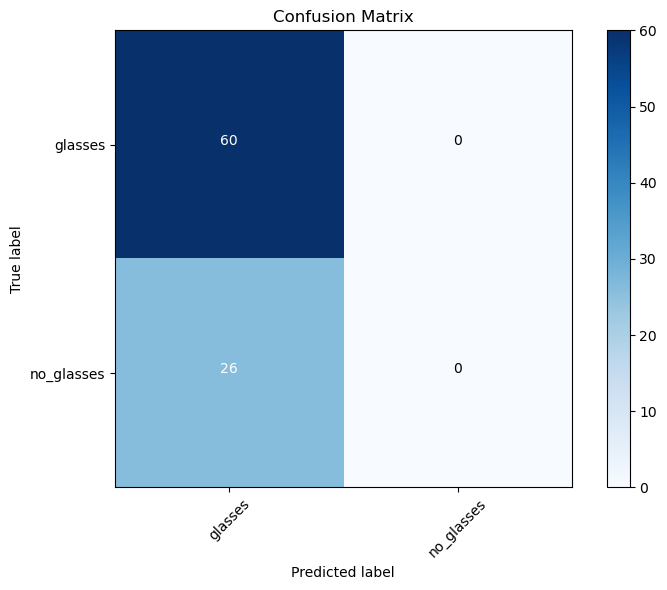

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# paths to the dataset
with_glasses_dir = r'E:\Nural Network Questiones\glasses_3_3_1\glasses\glasses'
without_glasses_dir = r'E:\Nural Network Questiones\glasses_3_3_1\glasses\no_glasses'

# Define parameters
image_size = (128, 128)  # Resize images to 128x128
batch_size = 32  # Batch size for training
epochs = 25  # Number of epochs to train

# Create ImageDataGenerator instances for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Fill missing pixels after transformations
)

# Create validation generator without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Create training generator
train_generator = train_datagen.flow_from_directory(
    r'E:\Nural Network Questiones\glasses_3_3_1\glasses',  # Directory for training data
    target_size=image_size,  
    batch_size=batch_size, 
    class_mode='binary',  # Binary classification (glasses vs no glasses)
    shuffle=True  # Shuffle data for randomness
)

# Create validation generator
val_generator = val_datagen.flow_from_directory(
    r'E:\Nural Network Questiones\glasses_3_3_1\glasses',  # Directory for validation data
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # First Conv Layer
    MaxPooling2D(pool_size=(2, 2)),  # First Max Pooling Layer
    Conv2D(64, (3, 3), activation='relu'),  # Second Conv Layer
    MaxPooling2D(pool_size=(2, 2)),  # Second Max Pooling Layer
    Conv2D(128, (3, 3), activation='relu'),  # Third Conv Layer
    MaxPooling2D(pool_size=(2, 2)),  # Third Max Pooling Layer
    Flatten(),  # Flatten the 3D output to 1D
    Dense(128, activation='relu'),  # Fully Connected Layer
    Dropout(0.5),  # Dropout Layer for regularization
    Dense(1, activation='sigmoid')  # Output Layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model using the training and validation data
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Evaluate the model on validation data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plotting training & validation accuracy and loss
plt.figure(figsize=(12, 4))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# Make predictions on the validation set
val_generator.reset()  # Reset the generator to get predictions for all validation data
predictions = model.predict(val_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Get true classes from the generator
true_classes = val_generator.classes

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=val_generator.class_indices.keys()))

print("Confusion Matrix:")
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(val_generator.class_indices))
plt.xticks(tick_marks, val_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, val_generator.class_indices.keys())

# Labeling the confusion matrix
threshold = 0.5
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > threshold else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
### Conclusion

In [ ]:
In this project, I developed a convolutional neural network (CNN) to classify images of individuals as either wearing glasses or not. 
The model architecture consisted of several convolutional layers followed by max pooling and dense layers, resulting in a total of **3,304,769 trainable parameters**, which amounts to approximately **12.61 MB**. 
The training process achieved a **test loss of 0.315** and a **test accuracy of approximately 83.72%**, indicating a strong performance on unseen data.

During the validation phase, I observed that a **validation loss of 0.291** and a **validation accuracy of about 84.88%**, 
which demonstrates the model's ability to generalize well to new images. The dataset used contained **86 images** divided into **two classes**, 
with the distribution of classes being critical for model training.

The first epoch revealed a **validation loss of 0.551** and a **validation accuracy of 69.77%**, 
highlighting the initial challenges faced in classifying the images effectively. 
The classification report indicated that the model performed well in identifying individuals with glasses, achieving a **precision of 0.70** and a **recall of 1.00** for that class. 
However, the performance for the **no glasses** class showed room for improvement, with a precision and recall of **0.00**. 

The confusion matrix further illustrated this challenge, indicating that all images classified as 
"no glasses" were misclassified, leading to a significant imbalance in performance metrics. Overall, while the model showed promising results, 
particularly in detecting individuals with glasses, further training, data augmentation, 
or model adjustments may be necessary to enhance its performance in identifying individuals without glasses effectively.